<a href="https://colab.research.google.com/github/njweg/Machine-Learning-Exercises/blob/main/PCA_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following *Machine Learning with PyTorch and Scikit-Learn* by Sebastian Raschka et al.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
data.head  #the labels are col 0

<bound method NDFrame.head of      0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065

In [ ]:
from sklearn.preprocessing import StandardScaler

X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

#standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
Cov = np.cov(X_train_std.T)  #input to np.cov() needs to have the features along rows rather than along column
eigenvals, eigenvecs = np.linalg.eig(Cov)  #get eigenvals and eigenvecs of covariance matrix
print('\n Eigenvalues: \n', eigenvals)


 Eigenvalues: 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


The **explained variance ratio** for ith eigenvalue, $ \lambda_{i} $, is given by

$ \begin{align}
  \mathrm{ratio}_{i} = \frac{\lambda_{i}}{\sum \lambda_{j}}
  \end{align} $
  
This is interpreted as "the percent of the variance of the data explained by the ith principal component"

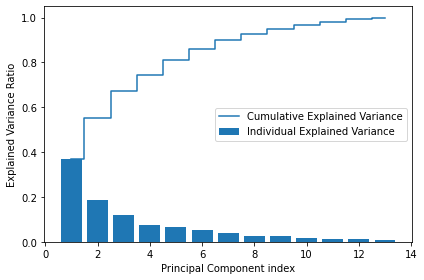

In [ ]:
#We will plot the explained var ratios ordered by size
import matplotlib.pyplot as plt

tot = sum(eigenvals)
ratios = [(i / tot) for i in sorted(eigenvals, reverse=True)]
cum_exp_var = np.cumsum(ratios)  #the cumulative sum of the ratios, which we'll plot as well

plt.bar(range(1,14), ratios, align='center', label='Individual Explained Variance')
plt.step(range(1,14), cum_exp_var, where='mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The first 3 components explain a bit over 60% of the variance so we'll use the first 3 eigenvecs as our new feature space basis. Remember, the coordinate transformation matrix is the matrix of our chosen basis vecs. We'll multiply every data point by this matrix to project the data into the new space (spanned by the first 3 eigenvecs)

In [ ]:
#Make list of eigenval, eigenvec pairs to be sorted
eigen_pairs = [(np.abs(eigenvals[i]), eigenvecs[:, i]) for i in range(len(eigenvals))]
#sort the pairs from high to low based on eigenval
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

#Create coordinate matrix W
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],  #np.newaxis in the col spot makes the array into a 2-dim column vec.
               eigen_pairs[1][1][:, np.newaxis]))
print('W matrix:\n', W)  #each column is an eigenvec

W matrix:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


Since we've put the matrix in dxk form (where dim. feature space = d and dim. chosen = k) instead of the usual kxd, we need to perform the transformation by $\vec{\mathbf{x}} W $ instead of $W  \vec{\mathbf{x}}$

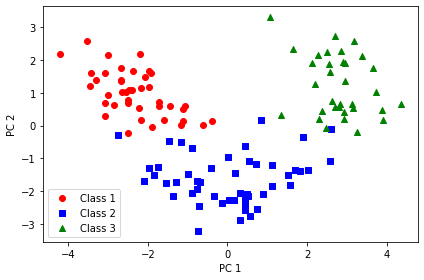

In [ ]:
X_train_pca = X_train_std.dot(W)  #new dataset is 124 rows, 2 cols instead of 13 cols

#scatterplot of data in new basis
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for i, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==i, 0],
                X_train_pca[y_train==i, 1],
                color=c, marker=m, label=f'Class {i}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

**loadings** are interpreted as the correlation between an original feature and a principal component. We scale an eigenvec by the square root of its eigenval (this is a singular value of X)

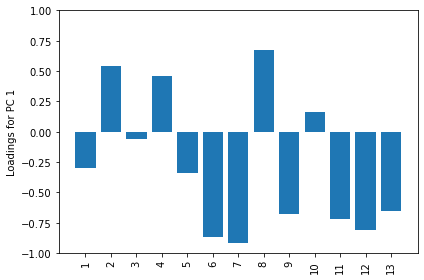

In [ ]:
loadings = eigenvecs * np.sqrt(eigenvals)  #13x13 matrix; element-wise mult, same as np.matmul()

#plot loadings for PC 1
fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')  #col 0 is the first sclaed eigenvec - i.e. PC1 loadings
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(data.columns[1:], rotation=90)
plt.ylim([-1,1])
plt.tight_layout()
plt.show()

SKlearn has a `PCA` class, a member of sklearn's transformer classes, imported from `sklearn.decomposition`. Initialize PCA object `pca = PCA(n_components=k)`, where k is the number of components we want. If we set `n_components=None` then all the components will be kept. Attributes -

- `explained_variance_ratio_` returns list of the ratios for all eigenvals; can only access if `n_components=None`
- `components_` the eigenvecs
- `explained_variance_` the eigenvals